In [74]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
import mplfinance as mpf

%matplotlib inline

In [11]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime.now()

In [54]:
tesla = web.DataReader('TSLA', 'yahoo', start, end)
nio = web.DataReader('NIO', 'yahoo', start, end)
li = web.DataReader('LI', 'yahoo', start, end)
xpev = web.DataReader('XPEV', 'yahoo', start, end)

tesla['Total Traded(MM)'] = (tesla['Open'] + tesla['Adj Close']) / 2 * tesla['Volume'] / 1000000
nio['Total Traded(MM)'] = (nio['Open'] + nio['Adj Close']) / 2 * nio['Volume'] / 1000000
li['Total Traded(MM)'] = (li['Open'] + li['Adj Close']) / 2 * li['Volume'] / 1000000
xpev['Total Traded(MM)'] = (xpev['Open'] + tesla['Adj Close']) / 2 * xpev['Volume'] / 1000000

tesla['MA50'] = tesla['Adj Close'].rolling(50).mean()
nio['MA50'] = nio['Adj Close'].rolling(50).mean()
li['MA50'] = li['Adj Close'].rolling(50).mean()
xpev['MA50'] = xpev['Adj Close'].rolling(50).mean()

tesla['MA200'] = tesla['Adj Close'].rolling(200).mean()
nio['MA200'] = nio['Adj Close'].rolling(200).mean()
li['MA200'] = li['Adj Close'].rolling(200).mean()
xpev['MA200'] = xpev['Adj Close'].rolling(200).mean()


In [53]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded(MM),MA50
Date,,,,,,,,
2020-12-14,642.750000,610.200012,619.000000,639.830017,52040600.0,639.830017,32755.134694,479.332399
2020-12-15,646.900024,623.799988,643.280029,633.250000,45223600.0,633.250000,28864.641716,483.483799
2020-12-16,632.500000,605.000000,628.229980,622.770020,42095800.0,622.770020,26330.922900,487.659600
2020-12-17,658.820007,619.500000,628.190002,655.900024,56270100.0,655.900024,36127.937110,492.271600
2020-12-18,695.000000,628.539978,668.900024,695.000000,218741900.0,695.000000,149171.041375,497.653200


Text(0, 0.5, 'Close Price')

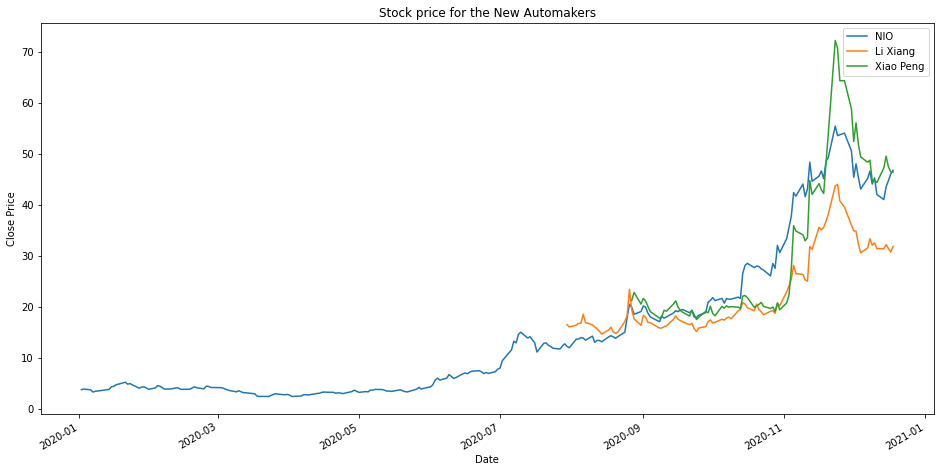

In [19]:
# tesla['Adj Close'].plot(label='Tesla', figsize=(16,8))
nio['Adj Close'].plot(label='NIO', figsize=(16,8))
li['Adj Close'].plot(label='Li Xiang')
xpev['Adj Close'].plot(label='Xiao Peng')
plt.legend()
plt.title('Stock price for the New Automakers')
plt.ylabel('Close Price')

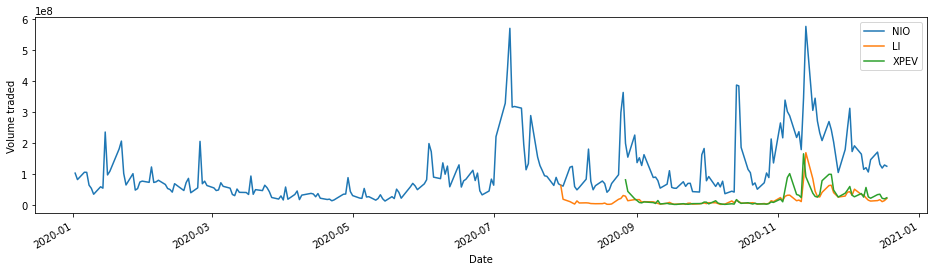

In [25]:
nio['Volume'].plot(label='NIO', figsize=(16, 4))
li['Volume'].plot(label='LI')
xpev['Volume'].plot(label='XPEV')
plt.ylabel('Volume traded')
plt.legend()

In [22]:
nio.idxmax()

High        2020-11-24
Low         2020-11-27
Open        2020-11-24
Close       2020-11-23
Volume      2020-11-13
Adj Close   2020-11-23
dtype: datetime64[ns]

In [23]:
nio.idxmin()

High        2020-03-23
Low         2020-03-18
Open        2020-03-19
Close       2020-03-23
Volume      2020-05-15
Adj Close   2020-03-23
dtype: datetime64[ns]

Text(0, 0.5, 'Total Traded')

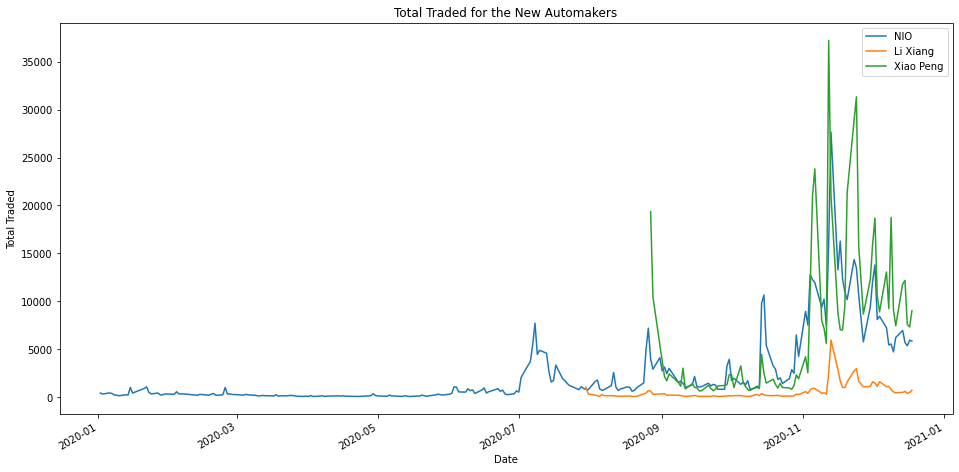

In [47]:
nio['Total Traded(MM)'].plot(label='NIO', figsize=(16,8))
li['Total Traded(MM)'].plot(label='Li Xiang')
xpev['Total Traded(MM)'].plot(label='Xiao Peng')
plt.legend()
plt.title('Total Traded for the New Automakers')
plt.ylabel('Total Traded')

In [50]:
xpev.iloc[xpev['Total Traded(MM)'].argmax()]

High                4.857000e+01
Low                 3.560000e+01
Open                3.648000e+01
Close               4.473000e+01
Volume              1.661462e+08
Adj Close           4.473000e+01
Total Traded(MM)    3.723669e+04
Name: 2020-11-12 00:00:00, dtype: float64

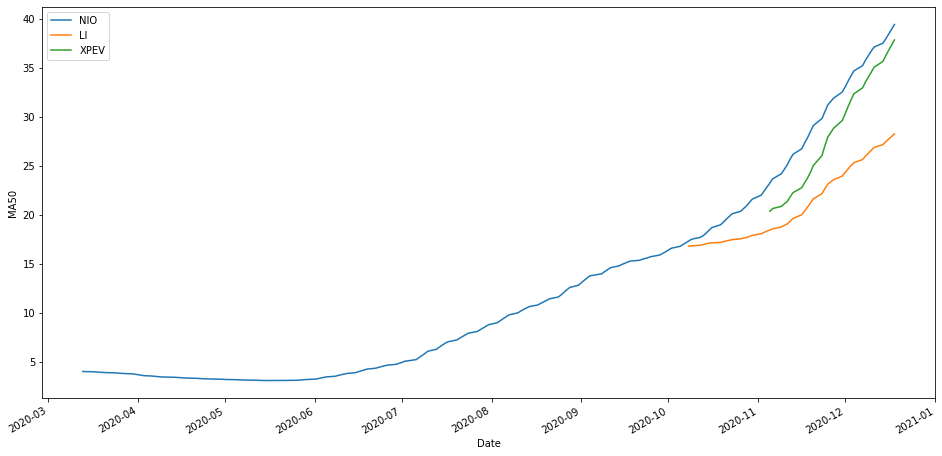

In [55]:
nio['MA50'].plot(label='NIO', figsize=(16, 8))
li['MA50'].plot(label='LI')
xpev['MA50'].plot(label='XPEV')
plt.ylabel('MA50')
plt.legend()

In [70]:
car_comp = pd.concat([tesla['Adj Close'], nio['Adj Close'], li['Adj Close'], xpev['Adj Close']], axis=1)
car_comp.columns = ['Tesla', 'Nio', 'Li', 'Xpev']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d7e6640>,
      dtype=object)

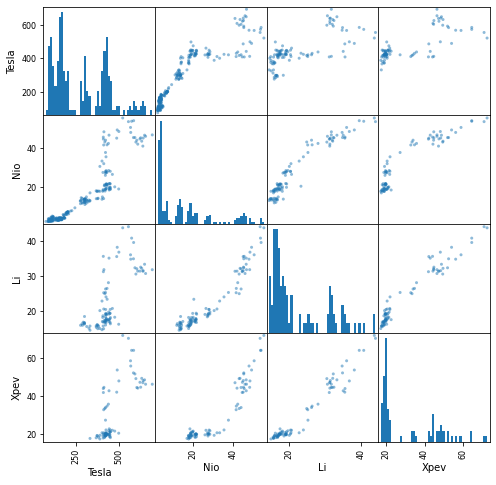

In [72]:
scatter_matrix(car_comp, figsize=(8,8), hist_kwds={'bins': 50})

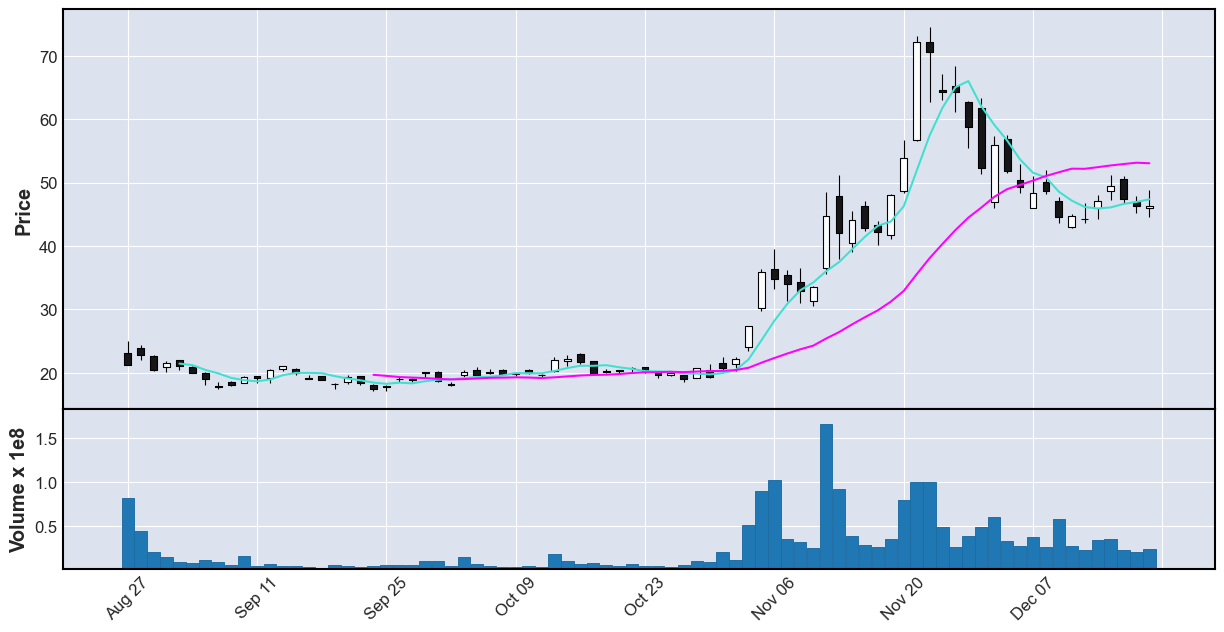

In [85]:
mpf.plot(xpev, type='candle', mav=(5,20), volume=True, figsize=(16,8))

In [100]:
# nio_reset = nio.loc['2020-03':'2020-03'].reset_index()
# nio_reset['date_ax'] = nio_reset['Date'].apply(lambda date: date2num(date))
# nio_values = [tuple(vals) for vals in nio_reset[['date_ax', 'Open', 'High', 'Low', 'Close', 'Adj Close']].values]
# nio_pd = pd.DataFrame(nio_values, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close'])

# mondays = WeekdayLocator(MONDAY)
# alldays = DayLocator()
# weekFormatter = DateFormatter('%b %d')
# dayFormatter = DateFormatter('%d')

# mpf.plot(nio_reset, type='candle')

In [105]:
# What stock is most stable?
tesla['Returns'] = (tesla['Close']) / tesla['Close'].shift(1) - 1
nio['Returns'] = (nio['Close']) / nio['Close'].shift(1) - 1
li['Returns'] = (li['Close']) / li['Close'].shift(1) - 1
xpev['Returns'] = (xpev['Close']) / xpev['Close'].shift(1) - 1

In [106]:
nio.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded(MM),MA50,MA200,Returns
Date,,,,,,,,,,
2020-12-14,41.480000,39.509998,39.939999,40.980000,171598200,40.980000,6942.863015,37.5084,16.22125,-0.023821
2020-12-15,43.840000,41.270000,42.470001,43.500000,132336900,43.500000,5688.501727,37.9466,16.41845,0.061493
2020-12-16,45.259998,43.330002,44.250000,44.669998,120109600,44.669998,5340.072706,38.4266,16.62245,0.026897
2020-12-17,46.049999,43.900002,45.169998,46.000000,130003700,46.000000,5926.218545,38.9154,16.83385,0.029774
2020-12-18,48.000000,45.520000,45.889999,46.720001,125939600,46.720001,5831.633216,39.4210,17.04970,0.015652


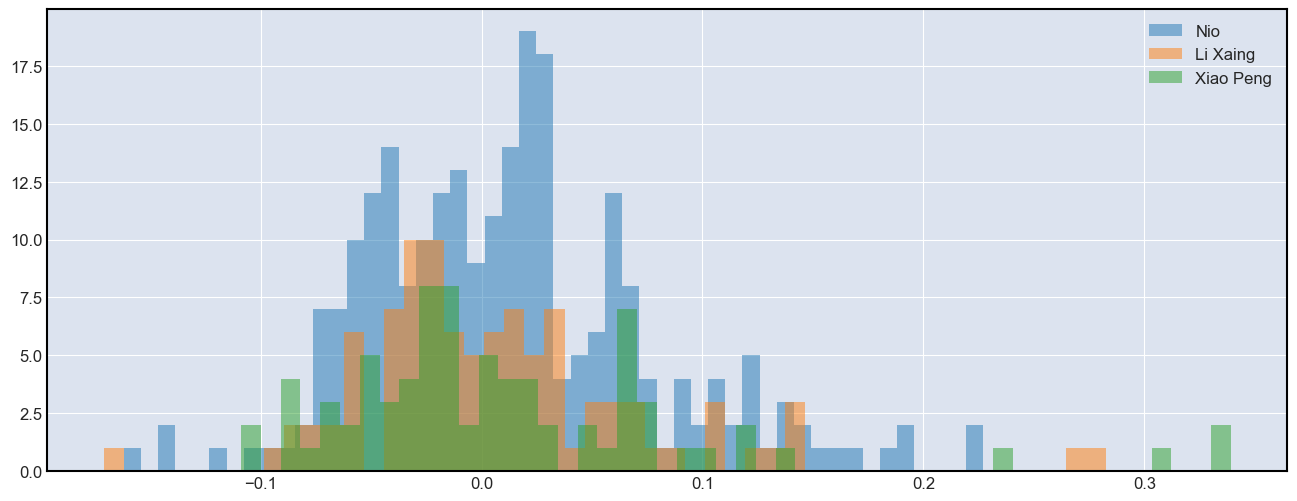

In [120]:
# tesla['Returns'].hist(bins=50, label='Tesla', alpha=0.5, figsize=(16, 8))
nio['Returns'].hist(bins=50, label='Nio', alpha=0.5, figsize=(16, 6))
li['Returns'].hist(bins=50, label='Li Xaing', alpha=0.5)
xpev['Returns'].hist(bins=50, label='Xiao Peng', alpha=0.5)
plt.legend()

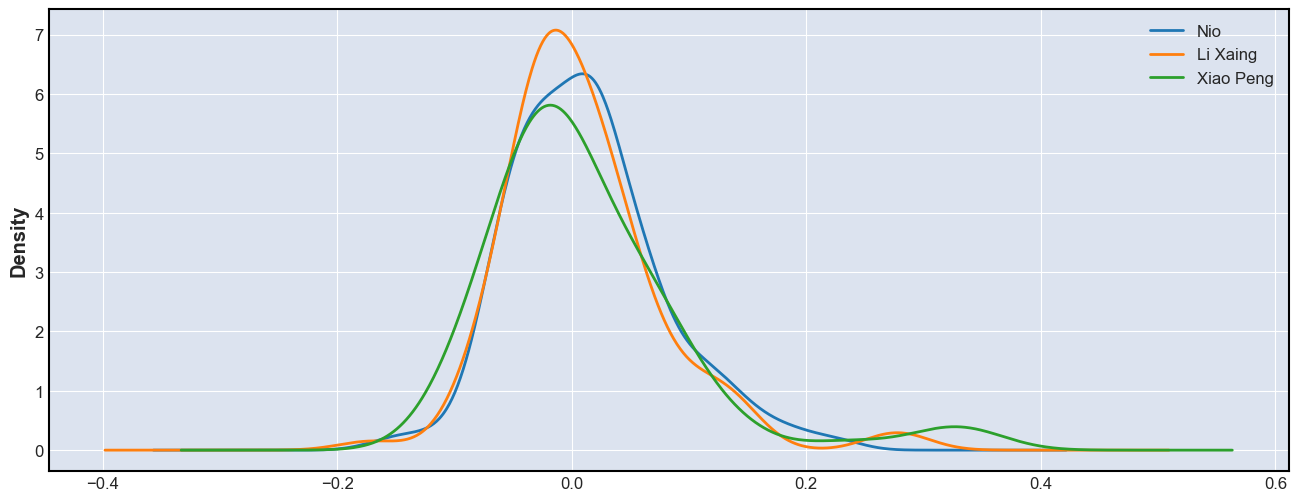

In [119]:
# tesla['Returns'].plot(kind='kde', label='Tesla')
nio['Returns'].plot(kind='kde', label='Nio', figsize=(16, 6))
li['Returns'].plot(kind='kde', label='Li Xaing')
xpev['Returns'].plot(kind='kde', label='Xiao Peng')
plt.legend()

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


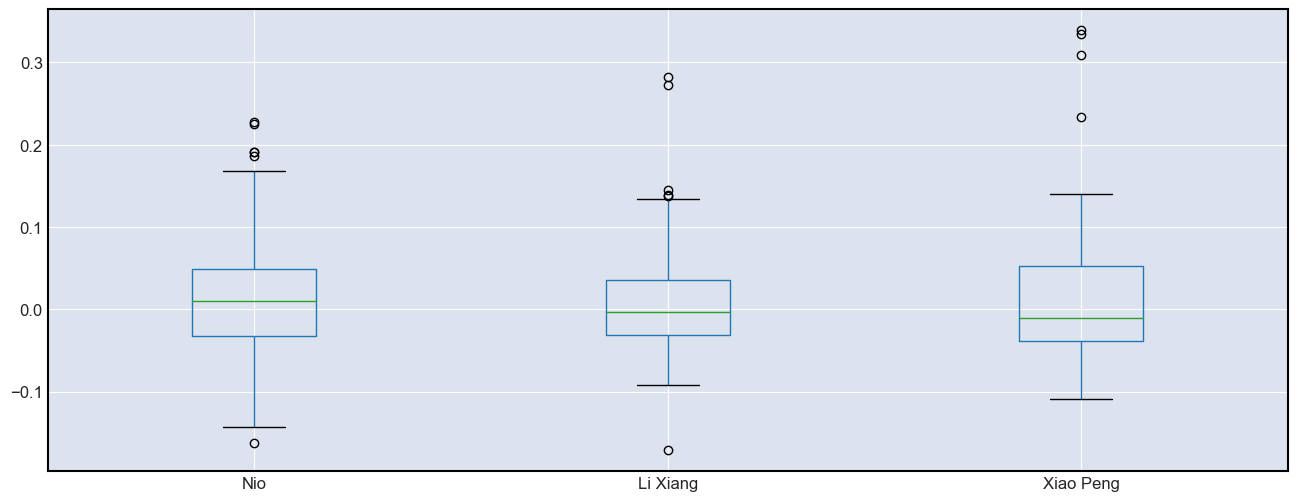

In [123]:
box_df = pd.concat([nio['Returns'], li['Returns'], xpev['Returns']], axis=1)
box_df.columns = ['Nio', 'Li Xiang', 'Xiao Peng']
box_df.plot(kind='box', figsize=(16, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x145b82a60>,
      dtype=object)

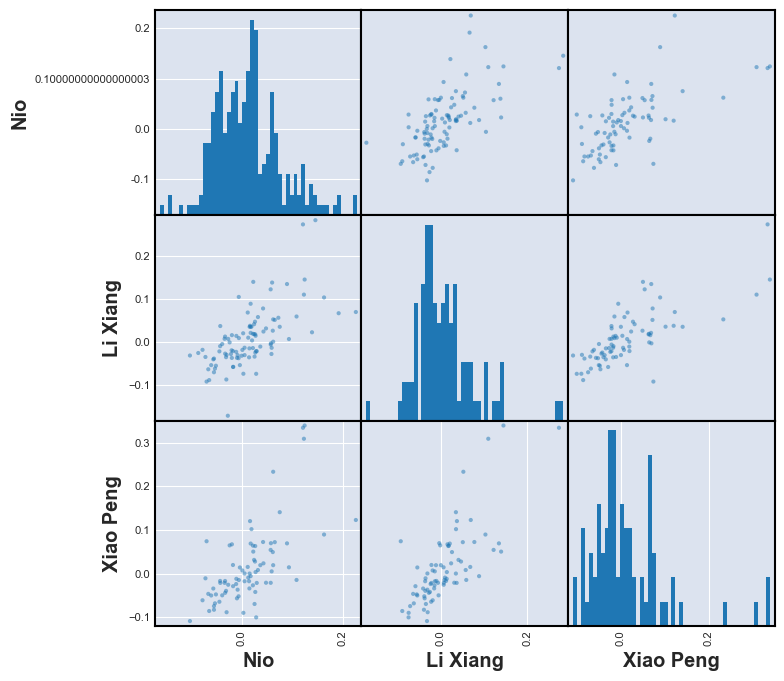

In [125]:
scatter_matrix(box_df, figsize=(8,8), hist_kwds={'bins': 50})

## Cummulative Return

In [128]:
tesla['Cumulative Return'] = (1 + tesla['Returns']).cumprod()
nio['Cumulative Return'] = (1 + nio['Returns']).cumprod()
li['Cumulative Return'] = (1 + li['Returns']).cumprod()
xpev['Cumulative Return'] = (1 + xpev['Returns']).cumprod()

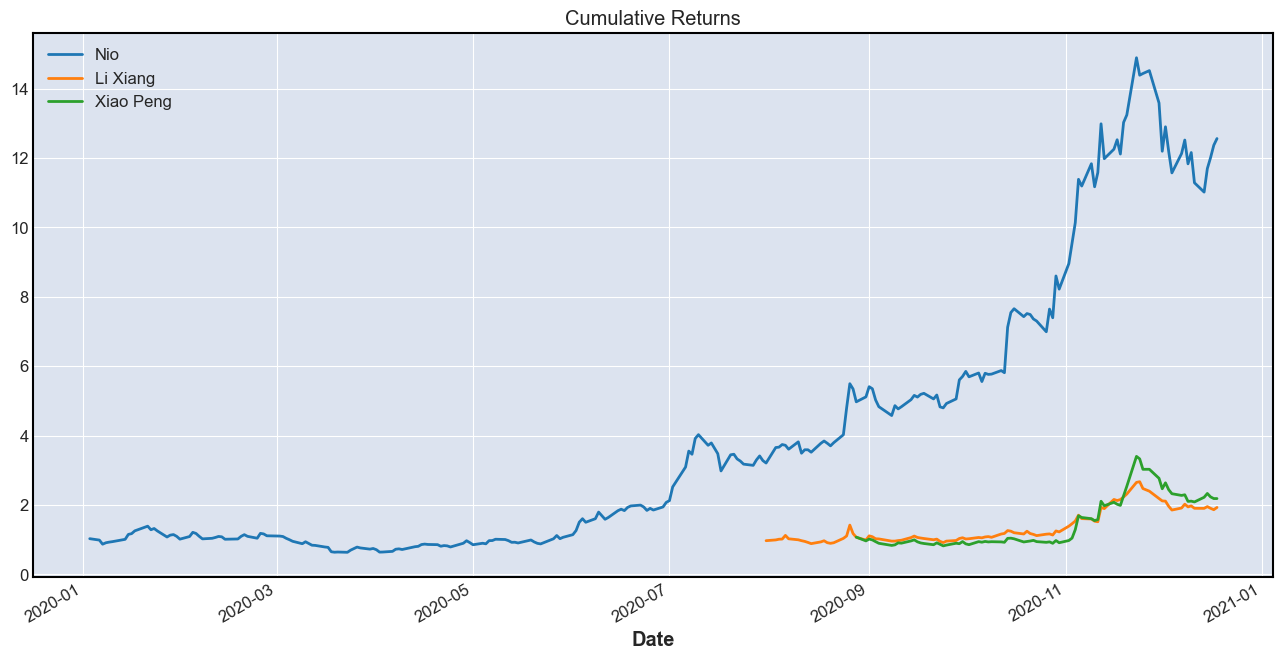

In [130]:
nio['Cumulative Return'].plot(label='Nio', figsize=(16,8))
li['Cumulative Return'].plot(label='Li Xiang', figsize=(16,8))
xpev['Cumulative Return'].plot(label='Xiao Peng', figsize=(16,8))
plt.title('Cumulative Returns')
plt.legend()